In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
import time
from sklearn.metrics import confusion_matrix, mean_squared_error
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn import neural_network
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA,FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis
from sklearn.neural_network import MLPClassifier

In [2]:
mnist = fetch_openml('mnist_784',version=1)    # MNIST dataset is images of handwritten digits 0-9
x = mnist["data"]     # the data  # should be an array of 28 px x 28 px images (784 features, one per pixel)
y = mnist['target']   # the labels for the data
y = y.astype(np.uint8)  # labels are formatted as strings, need to change to uint8


# create test set
# Note: MNIST is already split into a (shuffled) training set and a test set
x_train, x_test, y_train, y_test = x[:60000],x[60000:],y[:60000],y[60000:]
        

# scale the inputs
x_train = minmax_scale(x_train.astype(np.float64))


def show_digit(i,save=False):
    digit = x_train[i].copy()
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    if save:
        plt.savefig("Images/Digit"+str(i)+'.png')
    plt.show()

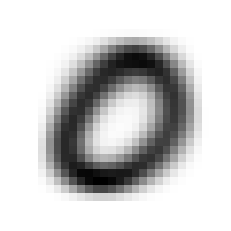

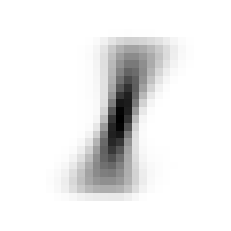

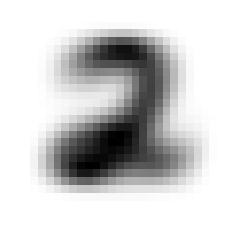

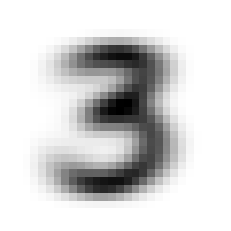

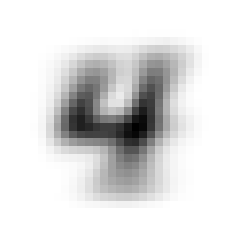

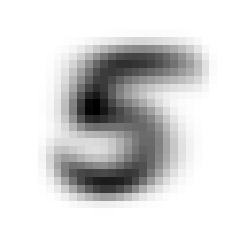

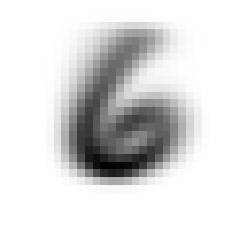

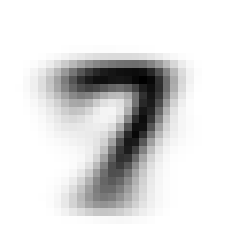

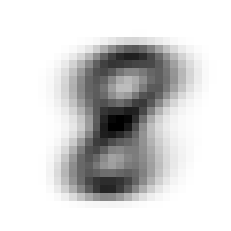

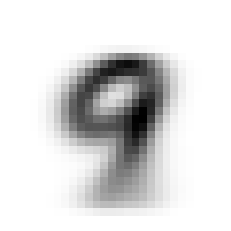

In [3]:
#create an average of each number
#used for initializing cluster centers
zero = []
one = []
two = []
three = []
four = []
five = []
six = []
sev = []
eight = []
nine = []

for i in range(0,len(x_train)):
    if y_train[i]==0:
        zero.append(x_train[i])
    elif y_train[i]==1:
        one.append(x_train[i])
    elif y_train[i]==2:
        two.append(x_train[i])
    elif y_train[i]==3:
        three.append(x_train[i])
    elif y_train[i]==4:
        four.append(x_train[i])
    elif y_train[i]==5:
        five.append(x_train[i])
    elif y_train[i]==6:
        six.append(x_train[i])
    elif y_train[i]==7:
        sev.append(x_train[i])
    elif y_train[i]==8:
        eight.append(x_train[i])
    elif y_train[i]==9:
        nine.append(x_train[i])
weight_vals = [len(zero),len(one),len(two),len(three),len(four),len(five),len(six),len(sev),len(eight),len(nine)]
sum_weights = sum(weight_vals)
for i in range(0,len(weight_vals)):
    weight_vals[i] = weight_vals[i]/sum_weights

mzero = np.average(zero, axis=0)
mone = np.average(one, axis=0)
mtwo = np.average(two, axis=0)
mthree = np.average(three, axis=0)
mfour = np.average(four, axis=0)
mfive = np.average(five, axis=0)
msix = np.average(six, axis=0)
msev = np.average(sev, axis=0)
meight = np.average(eight, axis=0)
mnine = np.average(nine, axis=0)

mean_init = [mzero,mone,mtwo,mthree,mfour,mfive,msix,msev,meight,mnine]
i = 0
for digit in mean_init:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/avg " + str(i) + ".png")
    plt.show()
    i += 1


In [390]:
inertias = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, n_init=50, random_state=1).fit(x_train)
    inertias.append(kmeans.inertia_)

KeyboardInterrupt: 

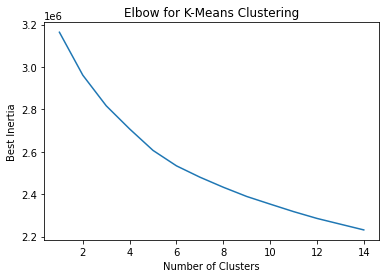

In [394]:
plt.plot(range(1,15),inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Best Inertia")
plt.title("Elbow for K-Means Clustering")
plt.savefig("Images/kmeans_clusters_inertia.png")
plt.show()

In [417]:
kmeans = KMeans(n_clusters=10, n_init=50, random_state=1).fit(x_train)

In [4]:
kmeans = KMeans(n_clusters=10, n_init=1, init=np.asarray(mean_init), random_state=1).fit(x_train)

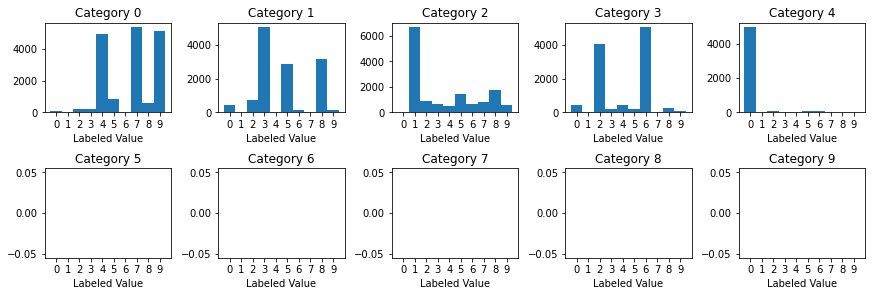

In [396]:
cat0 = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

for i in range(0,len(x_train)):
    if kmeans.labels_[i]==0:
        cat0.append(y_train[i])
    elif kmeans.labels_[i]==1:
        cat1.append(y_train[i])
    elif kmeans.labels_[i]==2:
        cat2.append(y_train[i])
    elif kmeans.labels_[i]==3:
        cat3.append(y_train[i])
    elif kmeans.labels_[i]==4:
        cat4.append(y_train[i])
    elif kmeans.labels_[i]==5:
        cat5.append(y_train[i])
    elif kmeans.labels_[i]==6:
        cat6.append(y_train[i])
    elif kmeans.labels_[i]==7:
        cat7.append(y_train[i])
    elif kmeans.labels_[i]==8:
        cat8.append(y_train[i])
    else:
        cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('Category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
#plt.savefig("Images/kmeans_categoriesvslabels.png")
plt.savefig("Images/kmeans_categoriesvslabels_50inits_5cats.png")
plt.show()

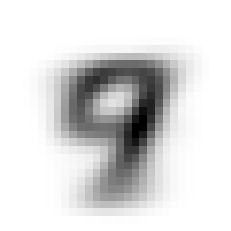

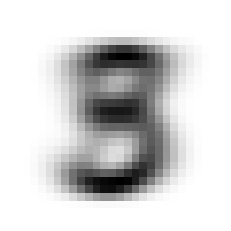

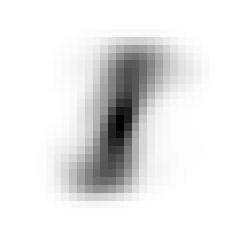

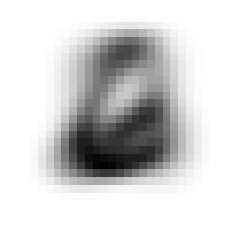

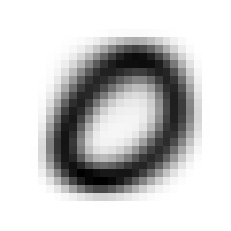

In [397]:
kmeans_centers = kmeans.cluster_centers_
i = 0
for digit in kmeans_centers:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/kmeans_centers " + str(i) + "_50inits_5centers.png")
    #plt.savefig("Images/kmeans_centers " + str(i) + ".png")
    plt.show()
    i += 1

In [398]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(x_train,kmeans.labels_)

In [399]:
print(silhouette_score_kmeans)

0.06652167935438894


In [409]:
scores = []
for i in range(2,21):
    gmm = GaussianMixture(n_components=i, n_init=10,covariance_type='full', warm_start=True,random_state=1)
    gm_labels = gmm.fit_predict(x_train[0:1000])
    scores.append(silhouette_score(x_train[0:1000],gm_labels))

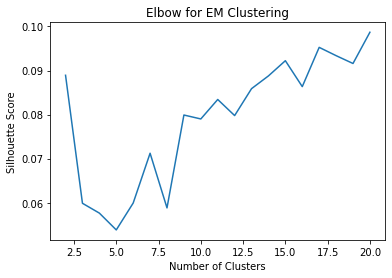

In [411]:
plt.plot(range(2,21),scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Elbow for EM Clustering")
plt.savefig("Images/gm_clusters_sil.png")
plt.show()

In [300]:
gmm = GaussianMixture(n_components=10, n_init=10,covariance_type='full', warm_start=True,random_state=1)
gm_labels = gmm.fit_predict(x_train)

checkpoint


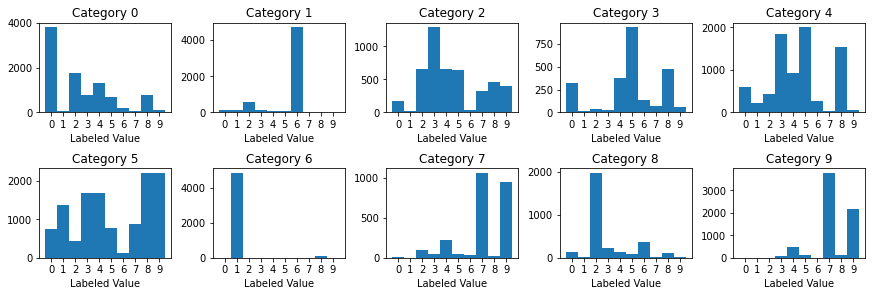

In [301]:
cat0 = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

for i in range(0,len(x_train)):
    if gm_labels[i]==0:
        cat0.append(y_train[i])
    elif gm_labels[i]==1:
        cat1.append(y_train[i])
    elif gm_labels[i]==2:
        cat2.append(y_train[i])
    elif gm_labels[i]==3:
        cat3.append(y_train[i])
    elif gm_labels[i]==4:
        cat4.append(y_train[i])
    elif gm_labels[i]==5:
        cat5.append(y_train[i])
    elif gm_labels[i]==6:
        cat6.append(y_train[i])
    elif gm_labels[i]==7:
        cat7.append(y_train[i])
    elif gm_labels[i]==8:
        cat8.append(y_train[i])
    else:
        cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('Category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/gm_categoriesvslabels.png")
plt.show()

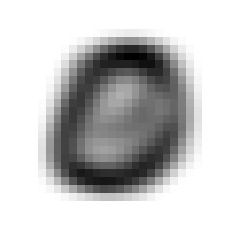

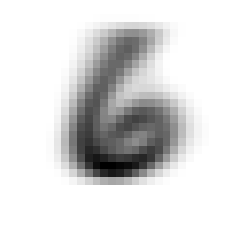

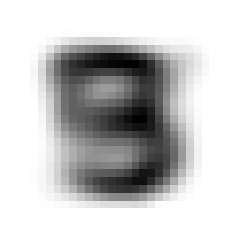

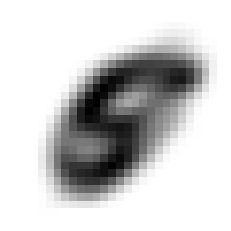

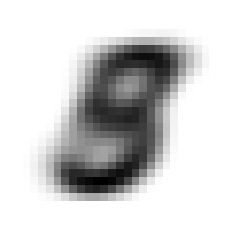

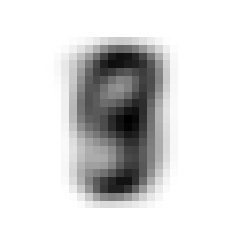

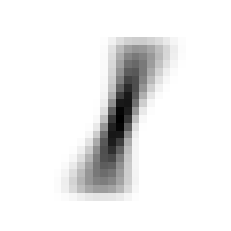

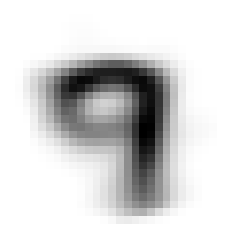

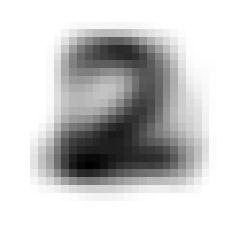

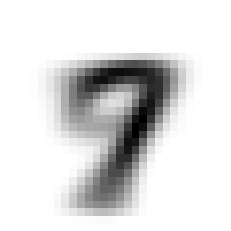

In [302]:
gm_means = gmm.means_
i = 0
for digit in gm_means:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/gm_means " + str(i) + ".png")
    plt.show()
    i += 1

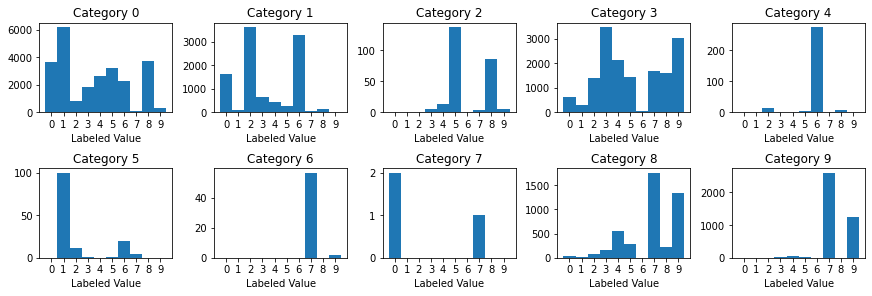

In [11]:
gmm2 = GaussianMixture(n_components=10, means_init=mean_init,covariance_type='full', random_state=1)
gm_labels = gmm2.fit_predict(x_train)
cat0 = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

for i in range(0,len(x_train)):
    if gm_labels[i]==0:
        cat0.append(y_train[i])
    elif gm_labels[i]==1:
        cat1.append(y_train[i])
    elif gm_labels[i]==2:
        cat2.append(y_train[i])
    elif gm_labels[i]==3:
        cat3.append(y_train[i])
    elif gm_labels[i]==4:
        cat4.append(y_train[i])
    elif gm_labels[i]==5:
        cat5.append(y_train[i])
    elif gm_labels[i]==6:
        cat6.append(y_train[i])
    elif gm_labels[i]==7:
        cat7.append(y_train[i])
    elif gm_labels[i]==8:
        cat8.append(y_train[i])
    else:
        cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('Category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/gm_categoriesvslabels_means_init.png")
plt.show()

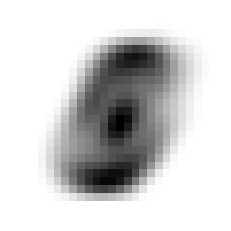

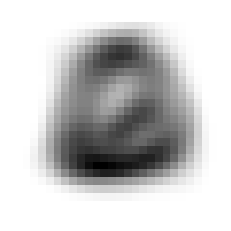

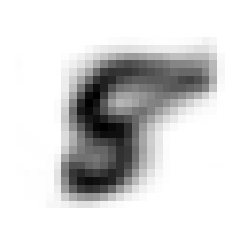

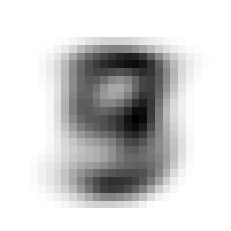

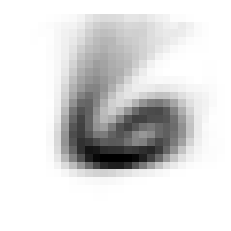

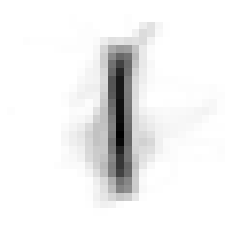

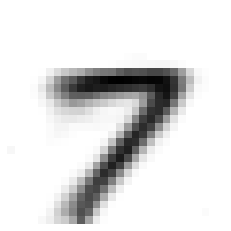

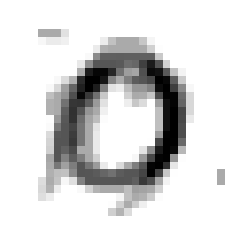

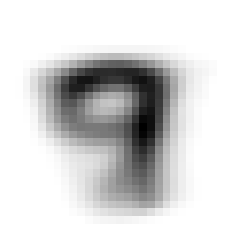

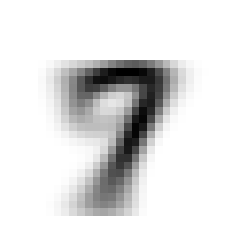

In [12]:
gm_means = gmm2.means_
i = 0
for digit in gm_means:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/gm_means " + str(i) + "_means_init.png")
    plt.show()
    i += 1

In [157]:
pca = PCA(n_components=784,random_state=1)
x_pca = pca.fit_transform(x_train)

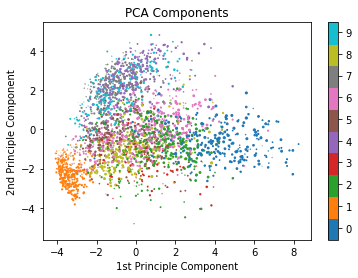

In [104]:
p = plt.scatter(x_pca[0:5000,0],x_pca[0:5000,1],x_pca[0:5000,2],c=y_train[0:5000],cmap="tab10")
c = plt.colorbar(p)
c.set_ticks(np.linspace(0.5, 9.5, num=11))
c.set_ticklabels(range(0,10))
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title('PCA Components')
plt.savefig('Images/PCA_components12.png')
plt.show()

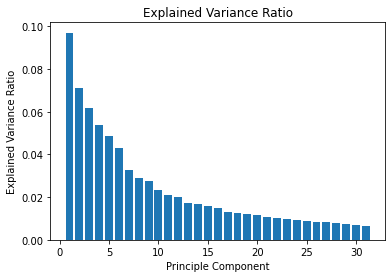

In [129]:
plt.bar(range(1,32),pca.explained_variance_ratio_[0:31])
plt.title('Explained Variance Ratio')
plt.xlabel('Principle Component')
plt.ylabel('Explained Variance Ratio')
plt.savefig('Images/PCA_Explained_Variance_Ratio.png')
plt.show()

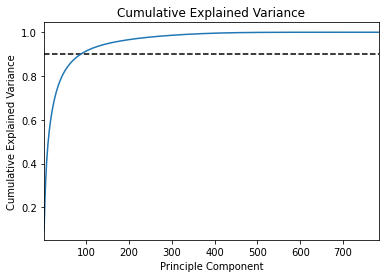

In [130]:
cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,785), cumulative)
plt.hlines(0.9,1,784,color='black',linestyles='dashed')
plt.xlim(1,784)
plt.xlabel('Principle Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.savefig('Images/PCA_cumulative_explained_variance.png')
plt.show()

In [144]:
thresh = np.argmin(abs(0.9-cumulative))
print(thresh)

86


In [217]:
pca2 = PCA(n_components=86,random_state=1)
x_pca = pca2.fit_transform(x_train)
x_pca_inv = pca2.inverse_transform(x_pca)
error = mean_squared_error(x_train,x_pca_inv)
print(error)

0.00682801224144783


In [9]:
reconst_error = []
for i in range(1,201):
    if i % 10 == 0:
        print(i)
    pca2 = PCA(n_components=i,random_state=1)
    x_pca = pca2.fit_transform(x_train)
    x_pca_inv = pca2.inverse_transform(x_pca)
    error = mean_squared_error(x_train,x_pca_inv)
    reconst_error.append(error)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


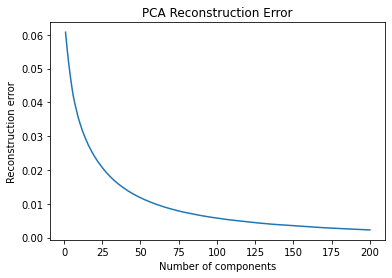

In [10]:
plt.plot(range(1,201),reconst_error)
plt.title("PCA Reconstruction Error")
plt.xlabel("Number of components")
plt.ylabel("Reconstruction error")
plt.savefig("Images/pca_reconstruction_error.png")
plt.show()

In [48]:
reconst_near_01 = []
for item in reconst_error:
    reconst_near_01.append(abs(0.01-item))
thresh2 = np.argmin(reconst_near_01)
print(thresh2)

58


In [158]:
pca = PCA(n_components=784,random_state=1)
x_pca = pca.fit_transform(x_train)

In [159]:
ica = FastICA(whiten=True,max_iter=1000,tol=0.005,random_state=1)
x_ica = ica.fit_transform(x_pca)

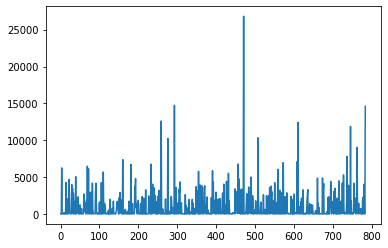

In [54]:
from scipy.stats import kurtosis
kurt = kurtosis(x_ica)
plt.plot(range(1,785),kurt)
plt.show()

In [59]:
kurtosis_features = []
for i,j in zip(kurt,list(range(0,784))):
    kurtosis_features.append((i,j))
    
kurtosis_features.sort(reverse=True)
print(kurtosis_features[0:10])

[(26818.76357033396, 470), (14737.253555268939, 292), (14609.394074855409, 783), (12608.216808707843, 258), (12428.718805460088, 610), (11860.376373936544, 745), (10327.211282605856, 507), (10236.584029993757, 275), (9033.821778710873, 762), (7805.543338415892, 736)]


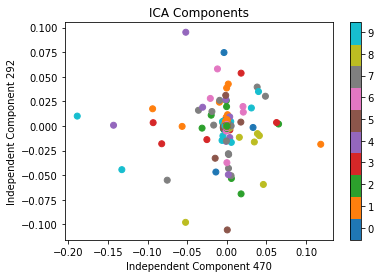

In [84]:
p = plt.scatter(x_ica[0:5000:,470],x_ica[0:5000:,292],c=y_train[0:5000],cmap="tab10")
c = plt.colorbar(p)
c.set_ticks(np.linspace(0.5, 9.5, num=11))
c.set_ticklabels(range(0,10))
#plt.xlim(-0.005,0.005)
#plt.ylim(-0.005,0.005)
plt.xlabel("Independent Component 470")
plt.ylabel("Independent Component 292")
plt.title('ICA Components')
plt.savefig('Images/ICA_components12.png')

plt.show()

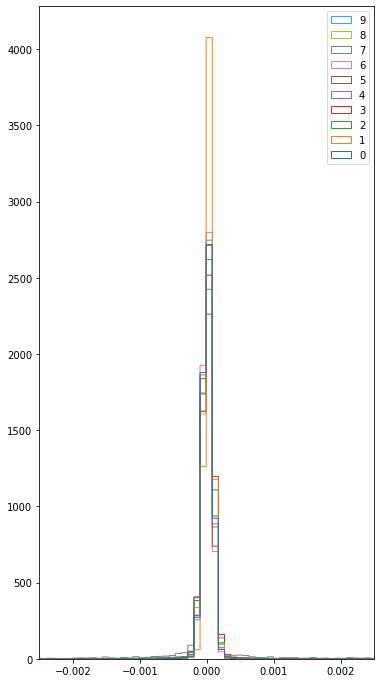

In [130]:
x_ica_0 = []
x_ica_1 = []
x_ica_2 = []
x_ica_3 = []
x_ica_4 = []
x_ica_5 = []
x_ica_6 = []
x_ica_7 = []
x_ica_8 = []
x_ica_9 = []
for i in range(0,60000):
    if y_train[i] == 0:
        x_ica_0.append(x_ica[i,470])
    elif y_train[i] == 1:
        x_ica_1.append(x_ica[i,470])
    elif y_train[i] == 2:
        x_ica_2.append(x_ica[i,470])
    elif y_train[i] == 3:
        x_ica_3.append(x_ica[i,470])
    elif y_train[i] == 4:
        x_ica_4.append(x_ica[i,470])
    elif y_train[i] == 5:
        x_ica_5.append(x_ica[i,470])
    elif y_train[i] == 6:
        x_ica_6.append(x_ica[i,470])
    elif y_train[i] == 7:
        x_ica_7.append(x_ica[i,470])
    elif y_train[i] == 8:
        x_ica_8.append(x_ica[i,470])
    elif y_train[i] == 9:
        x_ica_9.append(x_ica[i,470])
plt.figure(figsize=(6,12))
plt.hist([x_ica_0,x_ica_1,x_ica_2,x_ica_3,x_ica_4,x_ica_5,x_ica_6,x_ica_7,x_ica_8,x_ica_9],bins = 10000,histtype='step',label=[0,1,2,3,4,5,6,7,8,9])
plt.xlim(-0.0025,0.0025)
plt.legend()
plt.show()

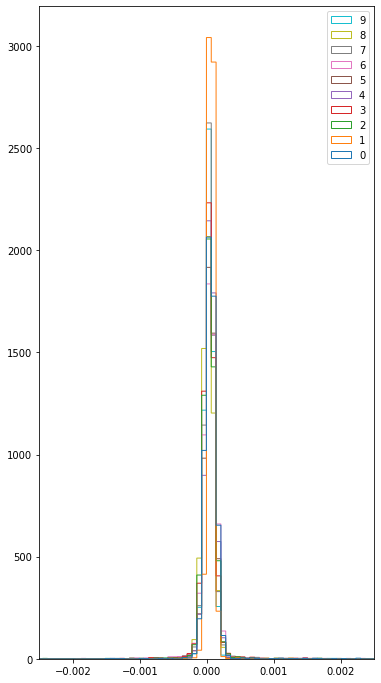

In [131]:
x_ica_0 = []
x_ica_1 = []
x_ica_2 = []
x_ica_3 = []
x_ica_4 = []
x_ica_5 = []
x_ica_6 = []
x_ica_7 = []
x_ica_8 = []
x_ica_9 = []
for i in range(0,60000):
    if y_train[i] == 0:
        x_ica_0.append(x_ica[i,292])
    elif y_train[i] == 1:
        x_ica_1.append(x_ica[i,292])
    elif y_train[i] == 2:
        x_ica_2.append(x_ica[i,292])
    elif y_train[i] == 3:
        x_ica_3.append(x_ica[i,292])
    elif y_train[i] == 4:
        x_ica_4.append(x_ica[i,292])
    elif y_train[i] == 5:
        x_ica_5.append(x_ica[i,292])
    elif y_train[i] == 6:
        x_ica_6.append(x_ica[i,292])
    elif y_train[i] == 7:
        x_ica_7.append(x_ica[i,292])
    elif y_train[i] == 8:
        x_ica_8.append(x_ica[i,292])
    elif y_train[i] == 9:
        x_ica_9.append(x_ica[i,292])
plt.figure(figsize=(6,12))
plt.hist([x_ica_0,x_ica_1,x_ica_2,x_ica_3,x_ica_4,x_ica_5,x_ica_6,x_ica_7,x_ica_8,x_ica_9],bins = 10000,histtype='step',label=[0,1,2,3,4,5,6,7,8,9])
plt.xlim(-0.0025,0.0025)
plt.legend()
plt.show()

In [34]:
kurtosis_vals = []
reconst_error_ica = []
for i in range(10,785,10):
    if i%50 == 0:
        print(i)
    ica2 = FastICA(n_components=i,whiten=True,max_iter=1000,tol=0.005,random_state=5)
    x_ica2 = ica2.fit_transform(x_pca)
    x_ica_inv = ica2.inverse_transform(x_ica2)
    error = mean_squared_error(x_pca,x_ica_inv)
    kurt = kurtosis(x_ica2)
    kurtosis_vals.append(mean(kurt))
    reconst_error_ica.append(error)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


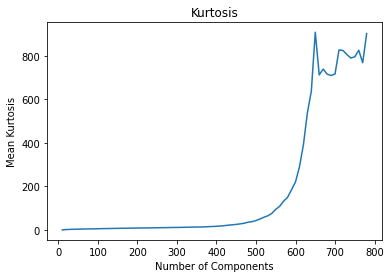

In [42]:
plt.plot(range(10,785,10),kurtosis_vals)
plt.title("Kurtosis")
plt.xlabel("Number of Components")
plt.ylabel("Mean Kurtosis")
plt.savefig("Images/ica_kurtosis_n_components.png")
plt.show()

In [43]:
kurtosis_vals.index(max(kurtosis_vals))
print(kurtosis_vals[63])
print(kurtosis_vals[64])
print(kurtosis_vals[65])
list(range(10,785,10))[64]

637.3985559115885
908.244866863646
712.4705575877662


650

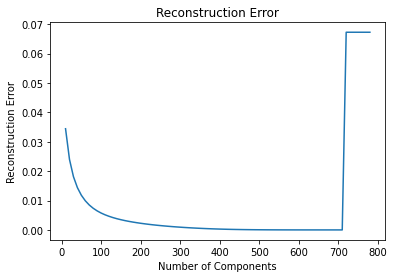

In [36]:
plt.plot(range(10,785,10),reconst_error_ica)
plt.title("Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.savefig("Images/ica_reconstruction_error_n_components.png")
plt.show()

In [49]:
reconst_near_01_ica = []
for item in reconst_error_ica:
    reconst_near_01_ica.append(abs(0.01-item))
thresh3 = np.argmin(reconst_near_01_ica)
print(thresh3)

5


In [371]:
rp = GaussianRandomProjection(n_components=784,eps=1,random_state=1)
x_rp = rp.fit_transform(x_train)

In [378]:
reconst_error_rp = [[],[],[],[],[],[],[],[],[],[]]
for j in range(0,10):
    for i in range(10,785,10):
        if i%50 == 0:
            print(i)
        rp = GaussianRandomProjection(n_components=i,random_state=j)
        ##thanks Dan!  https://piazza.com/class/kjwtraqiv511du?cid=623_f43
        x_rp = rp.fit_transform(x_train)
        inverse_data = np.linalg.pinv((rp.components_.T))
        reconstructed_data = x_rp.dot(inverse_data)
        ###
        error = mean_squared_error(x_train,reconstructed_data)
        reconst_error_rp[j].append(error)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


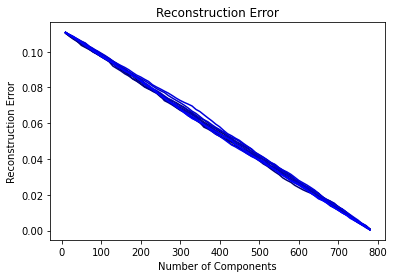

In [380]:
colors = ["#000066","#000077","#000088","#000099","#0000AA","#0000BB","#0000CC","#0000DD","#0000EE","#0000FF"]
for i in range(0,len(reconst_error_rp)):
    plt.plot(range(10,785,10),reconst_error_rp[i],color=colors[i])
plt.title("Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.savefig("Images/rp_reconstruction_error_n_components.png")
plt.show()

In [156]:
reconst_near_01_rp = []
for item in reconst_error_rp[0]:
    reconst_near_01_rp.append(abs(0.01-item))
thresh4= np.argmin(reconst_near_01_rp)
print(thresh4)
print(list(range(10,784,10))[71])

71
720


In [334]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [335]:
dt_features = dt.feature_importances_
indices = []
feature_imps = []
for i in range(0,len(dt_features)):
    if abs(dt_features[i]) > 0:
        indices.append(i)
        feature_imps.append(dt_features[i])
sorted_features = list(sorted(feature_imps,reverse=True))

In [343]:
grouped = []
for i,j in zip(feature_imps,indices):
    grouped.append((i,j))
grouped.sort(reverse=True)
print(grouped[0:2])

[(0.05386023339620887, 489), (0.04827774465132474, 435)]


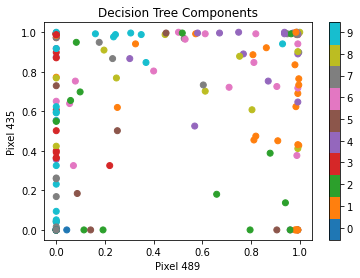

In [346]:
p = plt.scatter(x_train[0:200:,489],x_train[0:200:,435],c=y_train[0:200],cmap="tab10")
c = plt.colorbar(p)
c.set_ticks(np.linspace(0.5, 9.5, num=11))
c.set_ticklabels(range(0,10))
#plt.xlim(-0.005,0.005)
#plt.ylim(-0.005,0.005)
plt.xlabel("Pixel 489")
plt.ylabel("Pixel 435")
plt.title('Decision Tree Components')
plt.savefig('Images/DT_components12.png')

plt.show()

In [336]:
len(indices)

504

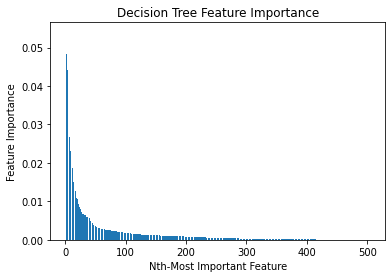

In [337]:
plt.bar(range(1,len(sorted_features)+1),sorted_features)
plt.title('Decision Tree Feature Importance')
plt.xlabel('Nth-Most Important Feature')
plt.ylabel('Feature Importance')
plt.savefig('Images/DT_Importance_sorted.png')
plt.show()

In [338]:
def dt_transform():
    x_dt = x_train.copy()
    x_dt = np.take(x_dt,indices,axis=1)
    return x_dt

def dt_inverse_transform(x_dt,num_keep):
    x_dt_inv = np.zeros(np.shape(x_train))
    for i in range(0,num_keep):
        x_dt_inv[:,indices[i]] = x_dt[:,i]
    return x_dt_inv

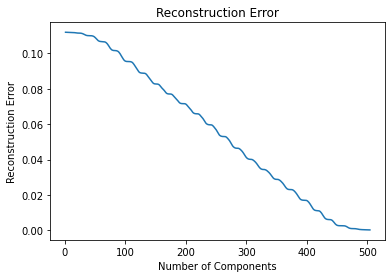

In [340]:
x_dt = dt_transform()

reconst_error_dt = []
for i in range(1,505):
    x_dt_inv = dt_inverse_transform(x_dt,i)
    error = mean_squared_error(x_train,x_dt_inv)
    reconst_error_dt.append(error)
    
plt.plot(range(1,505),reconst_error_dt)
plt.title("Reconstruction Error")
plt.xlabel("Number of Components")
plt.ylabel("Reconstruction Error")
plt.savefig("Images/dt_reconstruction_error_n_components.png")
plt.show()

In [341]:
reconst_near_01 = []
for item in reconst_error_dt:
    reconst_near_01.append(abs(0.01-item))
thresh4 = np.argmin(reconst_near_01)
print(thresh4)

423


In [347]:
pca = PCA(n_components=59,random_state=1)
x_pca = pca.fit_transform(x_train)
ica = FastICA(n_components=59,whiten=True,max_iter=1000,tol=0.005,random_state=1)
x_ica = ica.fit_transform(x_pca)
rp = GaussianRandomProjection(n_components=720,random_state=1)
x_rp = rp.fit_transform(x_train)
kmeans_pca = KMeans(n_clusters=10, n_init=100,random_state=1).fit(x_pca)
kmeans_ica = KMeans(n_clusters=10, n_init=100,random_state=1).fit(x_ica)
kmeans_rp = KMeans(n_clusters=10, n_init=100,random_state=1).fit(x_rp)
kmeans_dt = KMeans(n_clusters=10, n_init=100, random_state=1).fit(x_dt)

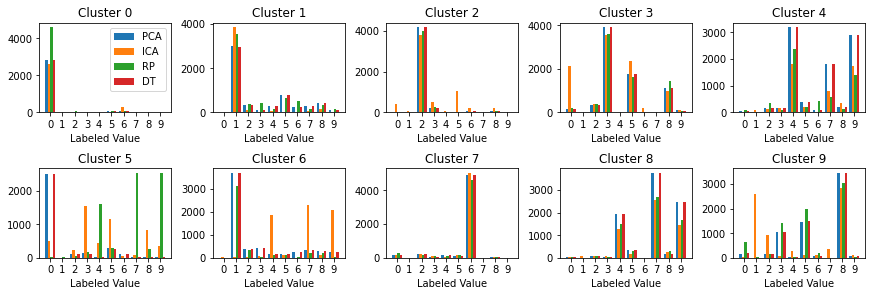

In [419]:
dt_cat0 = []
dt_cat1 = []
dt_cat2 = []
dt_cat3 = []
dt_cat4 = []
dt_cat5 = []
dt_cat6 = []
dt_cat7 = []
dt_cat8 = []
dt_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_dt.labels_[i]==0:
        dt_cat0.append(y_train[i])
    elif kmeans_dt.labels_[i]==1:
        dt_cat1.append(y_train[i])
    elif kmeans_dt.labels_[i]==2:
        dt_cat2.append(y_train[i])
    elif kmeans_dt.labels_[i]==3:
        dt_cat3.append(y_train[i])
    elif kmeans_dt.labels_[i]==4:
        dt_cat4.append(y_train[i])
    elif kmeans_dt.labels_[i]==5:
        dt_cat5.append(y_train[i])
    elif kmeans_dt.labels_[i]==6:
        dt_cat6.append(y_train[i])
    elif kmeans_dt.labels_[i]==7:
        dt_cat7.append(y_train[i])
    elif kmeans_dt.labels_[i]==8:
        dt_cat8.append(y_train[i])
    else:
        dt_cat9.append(y_train[i])

pca_cat0 = []
pca_cat1 = []
pca_cat2 = []
pca_cat3 = []
pca_cat4 = []
pca_cat5 = []
pca_cat6 = []
pca_cat7 = []
pca_cat8 = []
pca_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_pca.labels_[i]==0:
        pca_cat0.append(y_train[i])
    elif kmeans_pca.labels_[i]==1:
        pca_cat1.append(y_train[i])
    elif kmeans_pca.labels_[i]==2:
        pca_cat2.append(y_train[i])
    elif kmeans_pca.labels_[i]==3:
        pca_cat3.append(y_train[i])
    elif kmeans_pca.labels_[i]==4:
        pca_cat4.append(y_train[i])
    elif kmeans_pca.labels_[i]==5:
        pca_cat5.append(y_train[i])
    elif kmeans_pca.labels_[i]==6:
        pca_cat6.append(y_train[i])
    elif kmeans_pca.labels_[i]==7:
        pca_cat7.append(y_train[i])
    elif kmeans_pca.labels_[i]==8:
        pca_cat8.append(y_train[i])
    else:
        pca_cat9.append(y_train[i])
        
ica_cat0 = []
ica_cat1 = []
ica_cat2 = []
ica_cat3 = []
ica_cat4 = []
ica_cat5 = []
ica_cat6 = []
ica_cat7 = []
ica_cat8 = []
ica_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_ica.labels_[i]==0:
        ica_cat0.append(y_train[i])
    elif kmeans_ica.labels_[i]==1:
        ica_cat1.append(y_train[i])
    elif kmeans_ica.labels_[i]==2:
        ica_cat2.append(y_train[i])
    elif kmeans_ica.labels_[i]==3:
        ica_cat3.append(y_train[i])
    elif kmeans_ica.labels_[i]==4:
        ica_cat4.append(y_train[i])
    elif kmeans_ica.labels_[i]==5:
        ica_cat5.append(y_train[i])
    elif kmeans_ica.labels_[i]==6:
        ica_cat6.append(y_train[i])
    elif kmeans_ica.labels_[i]==7:
        ica_cat7.append(y_train[i])
    elif kmeans_ica.labels_[i]==8:
        ica_cat8.append(y_train[i])
    else:
        ica_cat9.append(y_train[i])        
        
rp_cat0 = []
rp_cat1 = []
rp_cat2 = []
rp_cat3 = []
rp_cat4 = []
rp_cat5 = []
rp_cat6 = []
rp_cat7 = []
rp_cat8 = []
rp_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_rp.labels_[i]==0:
        rp_cat0.append(y_train[i])
    elif kmeans_rp.labels_[i]==1:
        rp_cat1.append(y_train[i])
    elif kmeans_rp.labels_[i]==2:
        rp_cat2.append(y_train[i])
    elif kmeans_rp.labels_[i]==3:
        rp_cat3.append(y_train[i])
    elif kmeans_rp.labels_[i]==4:
        rp_cat4.append(y_train[i])
    elif kmeans_rp.labels_[i]==5:
        rp_cat5.append(y_train[i])
    elif kmeans_rp.labels_[i]==6:
        rp_cat6.append(y_train[i])
    elif kmeans_rp.labels_[i]==7:
        rp_cat7.append(y_train[i])
    elif kmeans_rp.labels_[i]==8:
        rp_cat8.append(y_train[i])
    else:
        rp_cat9.append(y_train[i])
fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist([pca_cat5,ica_cat0,rp_cat2,dt_cat7],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5],label=["PCA","ICA","RP","DT"])
axs[0,0].set_title('Cluster 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist([pca_cat6,ica_cat1,rp_cat3,dt_cat1],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Cluster 1')
axs[0,0].legend()
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist([pca_cat7,ica_cat6,rp_cat4,dt_cat3],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Cluster 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist([pca_cat1,ica_cat9,rp_cat7,dt_cat8],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Cluster 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist([pca_cat0,ica_cat5,rp_cat0,dt_cat2],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Cluster 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist([pca_cat9,ica_cat7,rp_cat5,dt_cat5],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Cluster 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist([pca_cat2,ica_cat4,rp_cat9,dt_cat4],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Cluster 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist([pca_cat8,ica_cat8,rp_cat8,dt_cat0],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Cluster 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist([pca_cat4,ica_cat3,rp_cat1,dt_cat9],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Cluster 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist([pca_cat3,ica_cat2,rp_cat6,dt_cat6],bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Cluster 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/kmeans_dim_reduce_categoriesvslabels.png")
plt.show()

In [363]:
from sklearn.metrics import silhouette_score
silhouette_score_kmeans = silhouette_score(x_train,kmeans.labels_)
silhouette_score_pca = silhouette_score(x_pca,kmeans_pca.labels_)
silhouette_score_ica = silhouette_score(x_ica,kmeans_ica.labels_)
silhouette_score_rp = silhouette_score(x_rp,kmeans_rp.labels_)
silhouette_score_dt = silhouette_score(x_dt,kmeans_dt.labels_)

NameError: name 'sihouette_score_kmeans' is not defined

In [364]:
print(silhouette_score_kmeans)
print(silhouette_score_pca)
print(silhouette_score_ica)
print(silhouette_score_rp)
print(silhouette_score_dt)

0.058455298267761475
0.08048283413270038
-0.03876978271546941
0.05597473151407297
0.05906996533916705


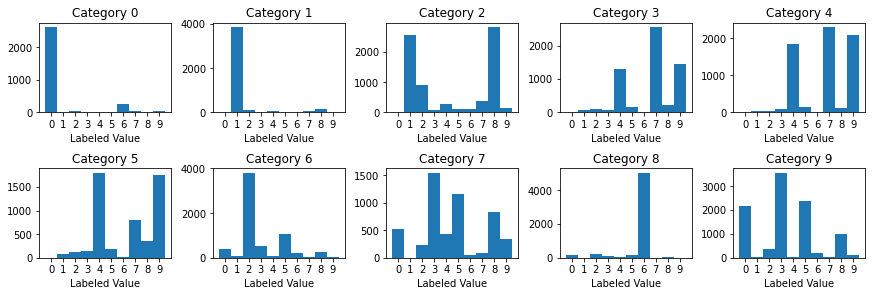

In [173]:
ica_cat0 = []
ica_cat1 = []
ica_cat2 = []
ica_cat3 = []
ica_cat4 = []
ica_cat5 = []
ica_cat6 = []
ica_cat7 = []
ica_cat8 = []
ica_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_ica.labels_[i]==0:
        ica_cat0.append(y_train[i])
    elif kmeans_ica.labels_[i]==1:
        ica_cat1.append(y_train[i])
    elif kmeans_ica.labels_[i]==2:
        ica_cat2.append(y_train[i])
    elif kmeans_ica.labels_[i]==3:
        ica_cat3.append(y_train[i])
    elif kmeans_ica.labels_[i]==4:
        ica_cat4.append(y_train[i])
    elif kmeans_ica.labels_[i]==5:
        ica_cat5.append(y_train[i])
    elif kmeans_ica.labels_[i]==6:
        ica_cat6.append(y_train[i])
    elif kmeans_ica.labels_[i]==7:
        ica_cat7.append(y_train[i])
    elif kmeans_ica.labels_[i]==8:
        ica_cat8.append(y_train[i])
    else:
        ica_cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(ica_cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('ica_category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(ica_cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('ica_category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(ica_cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('ica_category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(ica_cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('ica_category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(ica_cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('ica_category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(ica_cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('ica_category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(ica_cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('ica_category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(ica_cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('ica_category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(ica_cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('ica_category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(ica_cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('ica_category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/ica_kmeans_ica_categoriesvslabels.png")
plt.show()

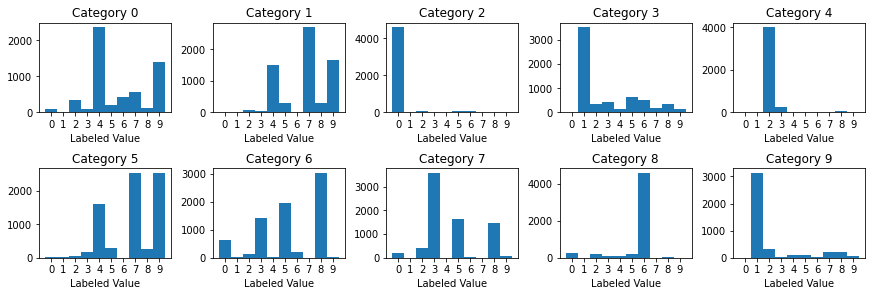

In [174]:
rp_cat0 = []
rp_cat1 = []
rp_cat2 = []
rp_cat3 = []
rp_cat4 = []
rp_cat5 = []
rp_cat6 = []
rp_cat7 = []
rp_cat8 = []
rp_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_rp.labels_[i]==0:
        rp_cat0.append(y_train[i])
    elif kmeans_rp.labels_[i]==1:
        rp_cat1.append(y_train[i])
    elif kmeans_rp.labels_[i]==2:
        rp_cat2.append(y_train[i])
    elif kmeans_rp.labels_[i]==3:
        rp_cat3.append(y_train[i])
    elif kmeans_rp.labels_[i]==4:
        rp_cat4.append(y_train[i])
    elif kmeans_rp.labels_[i]==5:
        rp_cat5.append(y_train[i])
    elif kmeans_rp.labels_[i]==6:
        rp_cat6.append(y_train[i])
    elif kmeans_rp.labels_[i]==7:
        rp_cat7.append(y_train[i])
    elif kmeans_rp.labels_[i]==8:
        rp_cat8.append(y_train[i])
    else:
        rp_cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(rp_cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('rp_category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(rp_cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('rp_category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(rp_cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('rp_category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(rp_cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('rp_category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(rp_cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('rp_category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(rp_cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('rp_category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(rp_cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('rp_category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(rp_cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('rp_category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(rp_cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('rp_category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(rp_cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('rp_category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/rp_kmeans_rp_categoriesvslabels.png")
plt.show()

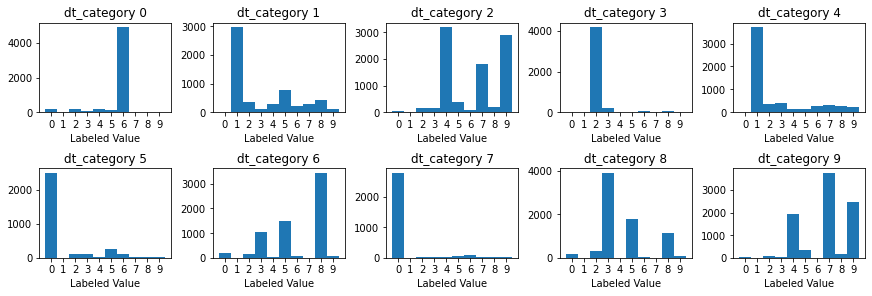

In [358]:
dt_cat0 = []
dt_cat1 = []
dt_cat2 = []
dt_cat3 = []
dt_cat4 = []
dt_cat5 = []
dt_cat6 = []
dt_cat7 = []
dt_cat8 = []
dt_cat9 = []

for i in range(0,len(x_train)):
    if kmeans_dt.labels_[i]==0:
        dt_cat0.append(y_train[i])
    elif kmeans_dt.labels_[i]==1:
        dt_cat1.append(y_train[i])
    elif kmeans_dt.labels_[i]==2:
        dt_cat2.append(y_train[i])
    elif kmeans_dt.labels_[i]==3:
        dt_cat3.append(y_train[i])
    elif kmeans_dt.labels_[i]==4:
        dt_cat4.append(y_train[i])
    elif kmeans_dt.labels_[i]==5:
        dt_cat5.append(y_train[i])
    elif kmeans_dt.labels_[i]==6:
        dt_cat6.append(y_train[i])
    elif kmeans_dt.labels_[i]==7:
        dt_cat7.append(y_train[i])
    elif kmeans_dt.labels_[i]==8:
        dt_cat8.append(y_train[i])
    else:
        dt_cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(dt_cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('dt_category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(dt_cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('dt_category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(dt_cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('dt_category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(dt_cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('dt_category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(dt_cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('dt_category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(dt_cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('dt_category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(dt_cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('dt_category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(dt_cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('dt_category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(dt_cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('dt_category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(dt_cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('dt_category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/dt_kmeans_dt_categoriesvslabels.png")
plt.show()

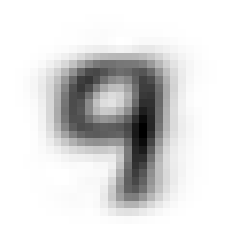

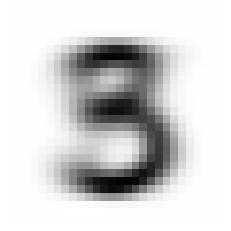

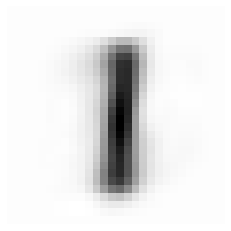

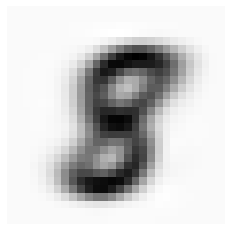

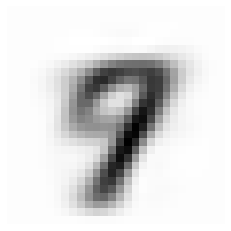

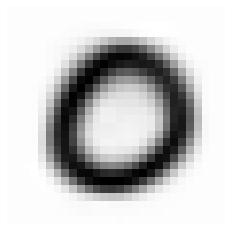

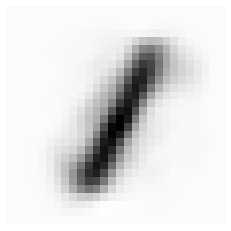

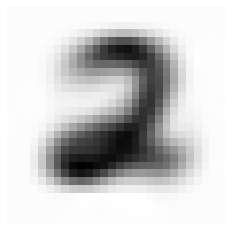

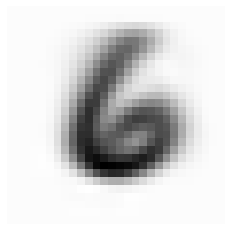

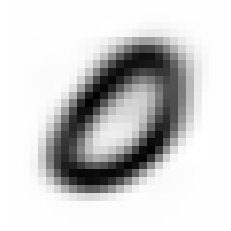

In [175]:
kmeans_centers = kmeans_pca.cluster_centers_
kmeans_inverse_trans = pca.inverse_transform(kmeans_centers)
i = 0
for digit in kmeans_inverse_trans:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/pca_kmeans_centers " + str(i) + ".png")
    plt.show()
    i += 1

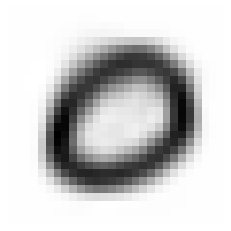

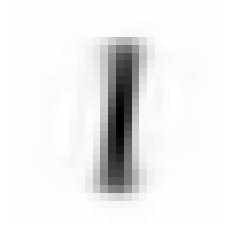

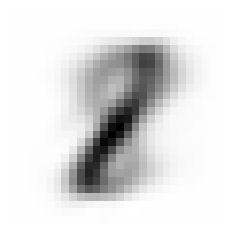

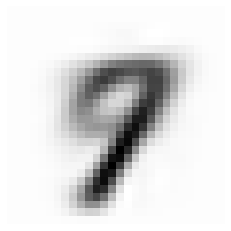

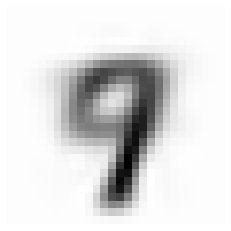

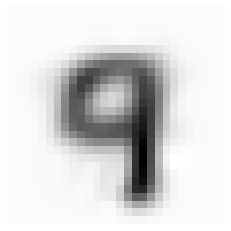

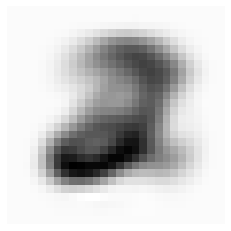

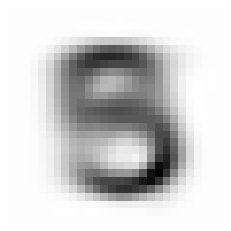

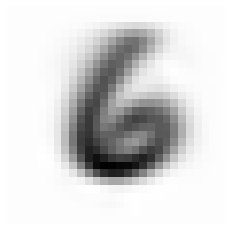

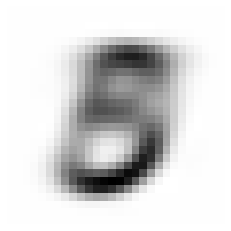

In [176]:
kmeans_centers = kmeans_ica.cluster_centers_
kmeans_inverse_trans = ica.inverse_transform(kmeans_centers)
kmeans_inverse_trans = pca.inverse_transform(kmeans_inverse_trans)
i = 0
for digit in kmeans_inverse_trans:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/ica_kmeans_centers " + str(i) + ".png")
    plt.show()
    i += 1

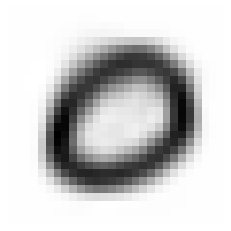

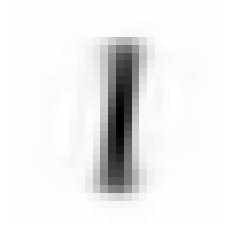

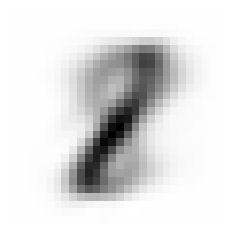

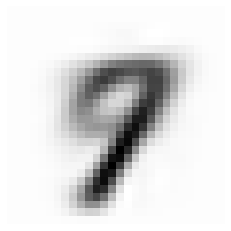

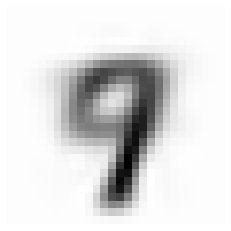

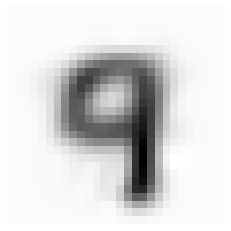

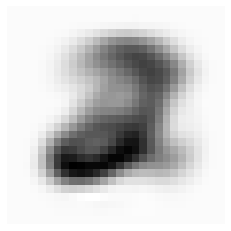

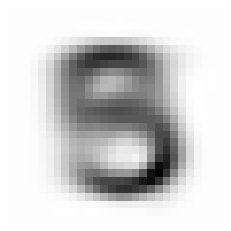

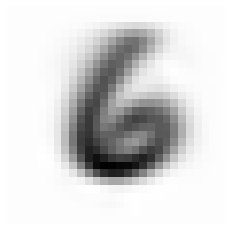

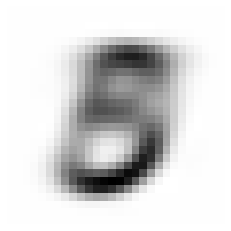

In [177]:
kmeans_centers = kmeans_rp.cluster_centers_
inverse_data = np.linalg.pinv((rp.components_.T))
reconstructed_data = kmeans_centers.dot(inverse_data)
i = 0
for digit in kmeans_inverse_trans:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/rp_kmeans_centers " + str(i) + ".png")
    plt.show()
    i += 1

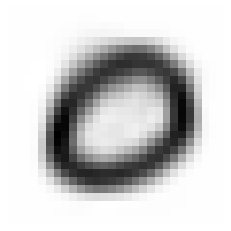

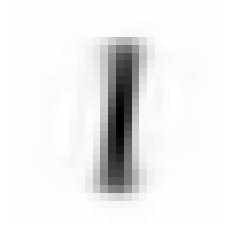

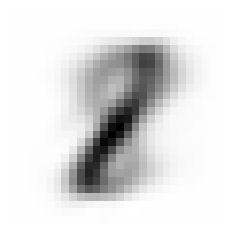

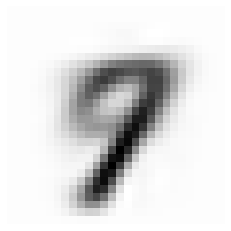

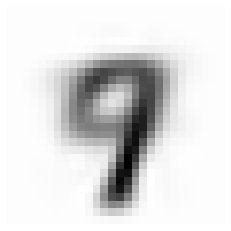

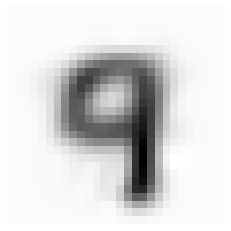

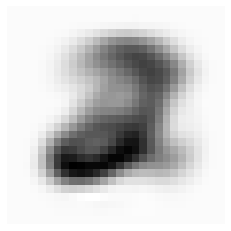

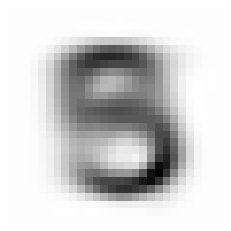

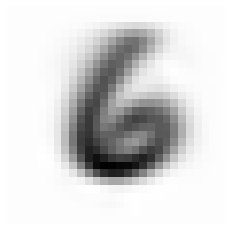

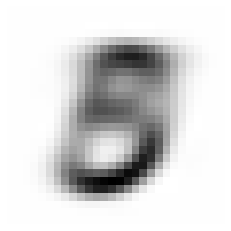

In [369]:
kmeans_centers = kmeans_dt.cluster_centers_
x_dt_inv = np.zeros((10,784))
for i in range(0,423):
    x_dt_inv[:,indices[i]] = kmeans_centers[:,i]

i = 0
for digit in kmeans_inverse_trans:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/dt_kmeans_centers " + str(i) + ".png")
    plt.show()
    i += 1

In [382]:
pca = PCA(n_components=59,random_state=1)
x_pca = pca.fit_transform(x_train)
ica = FastICA(n_components=59,whiten=True,max_iter=1000,tol=0.005,random_state=1)
x_ica = ica.fit_transform(x_pca)
rp = GaussianRandomProjection(n_components=720,random_state=1)
x_rp = rp.fit_transform(x_train)
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
x_dt = dt_transform()
gmm = GaussianMixture(n_components=10, n_init=10,covariance_type='full', random_state=1)
gmm_labels = gmm_pca.fit_predict(x_train)
gmm_pca = GaussianMixture(n_components=10, n_init=10,covariance_type='full', random_state=1)
gm_labels_pca = gmm_pca.fit_predict(x_pca)
gmm_ica = GaussianMixture(n_components=10, n_init=10,covariance_type='full', random_state=1)
gm_labels_ica = gmm_ica.fit_predict(x_ica)
gmm_rp = GaussianMixture(n_components=10, n_init=10,covariance_type='full', random_state=1)
gm_labels_rp = gmm_rp.fit_predict(x_rp)
gmm_dt = GaussianMixture(n_components=10, n_init=10,covariance_type='full', random_state=1)
gm_labels_dt = gmm_dt.fit_predict(x_dt)

KeyboardInterrupt: 

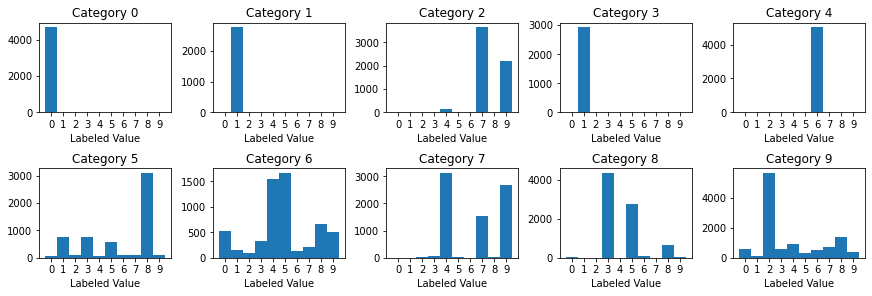

In [184]:
cat0 = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

for i in range(0,len(x_train)):
    if gm_labels_pca[i]==0:
        cat0.append(y_train[i])
    elif gm_labels_pca[i]==1:
        cat1.append(y_train[i])
    elif gm_labels_pca[i]==2:
        cat2.append(y_train[i])
    elif gm_labels_pca[i]==3:
        cat3.append(y_train[i])
    elif gm_labels_pca[i]==4:
        cat4.append(y_train[i])
    elif gm_labels_pca[i]==5:
        cat5.append(y_train[i])
    elif gm_labels_pca[i]==6:
        cat6.append(y_train[i])
    elif gm_labels_pca[i]==7:
        cat7.append(y_train[i])
    elif gm_labels_pca[i]==8:
        cat8.append(y_train[i])
    else:
        cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('Category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/pca_gm_categoriesvslabels.png")
plt.show()

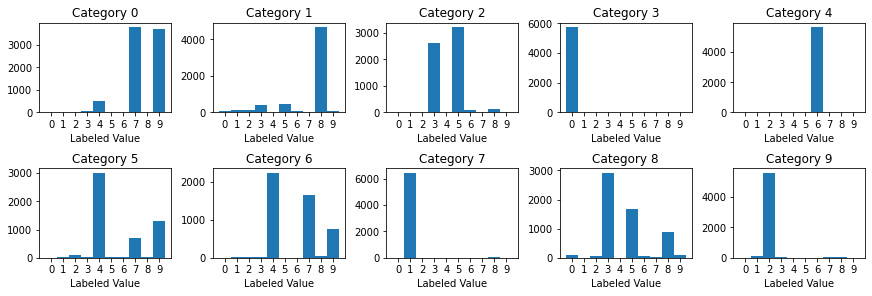

In [185]:
cat0 = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

for i in range(0,len(x_train)):
    if gm_labels_ica[i]==0:
        cat0.append(y_train[i])
    elif gm_labels_ica[i]==1:
        cat1.append(y_train[i])
    elif gm_labels_ica[i]==2:
        cat2.append(y_train[i])
    elif gm_labels_ica[i]==3:
        cat3.append(y_train[i])
    elif gm_labels_ica[i]==4:
        cat4.append(y_train[i])
    elif gm_labels_ica[i]==5:
        cat5.append(y_train[i])
    elif gm_labels_ica[i]==6:
        cat6.append(y_train[i])
    elif gm_labels_ica[i]==7:
        cat7.append(y_train[i])
    elif gm_labels_ica[i]==8:
        cat8.append(y_train[i])
    else:
        cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('Category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/ica_gm_categoriesvslabels.png")
plt.show()

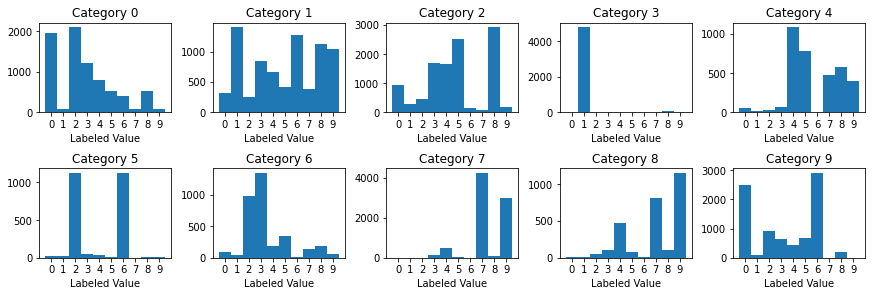

In [186]:
cat0 = []
cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

for i in range(0,len(x_train)):
    if gm_labels_rp[i]==0:
        cat0.append(y_train[i])
    elif gm_labels_rp[i]==1:
        cat1.append(y_train[i])
    elif gm_labels_rp[i]==2:
        cat2.append(y_train[i])
    elif gm_labels_rp[i]==3:
        cat3.append(y_train[i])
    elif gm_labels_rp[i]==4:
        cat4.append(y_train[i])
    elif gm_labels_rp[i]==5:
        cat5.append(y_train[i])
    elif gm_labels_rp[i]==6:
        cat6.append(y_train[i])
    elif gm_labels_rp[i]==7:
        cat7.append(y_train[i])
    elif gm_labels_rp[i]==8:
        cat8.append(y_train[i])
    else:
        cat9.append(y_train[i])

fig,axs = plt.subplots(2,5,figsize=(12,4),constrained_layout=True)
axs[0,0].hist(cat0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,0].set_title('Category 0')
axs[0,0].set_xticks(range(10))
axs[0,0].set_xlabel('Labeled Value')
axs[0,1].hist(cat1,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,1].set_title('Category 1')
axs[0,1].set_xticks(range(10))
axs[0,1].set_xlabel('Labeled Value')
axs[0,2].hist(cat2,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,2].set_title('Category 2')
axs[0,2].set_xticks(range(10))
axs[0,2].set_xlabel('Labeled Value')
axs[0,3].hist(cat3,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,3].set_title('Category 3')
axs[0,3].set_xticks(range(10))
axs[0,3].set_xlabel('Labeled Value')
axs[0,4].hist(cat4,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[0,4].set_title('Category 4')
axs[0,4].set_xticks(range(10))
axs[0,4].set_xlabel('Labeled Value')
axs[1,0].hist(cat5,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,0].set_title('Category 5')
axs[1,0].set_xticks(range(10))
axs[1,0].set_xlabel('Labeled Value')
axs[1,1].hist(cat6,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,1].set_title('Category 6')
axs[1,1].set_xticks(range(10))
axs[1,1].set_xlabel('Labeled Value')
axs[1,2].hist(cat7,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,2].set_title('Category 7')
axs[1,2].set_xticks(range(10))
axs[1,2].set_xlabel('Labeled Value')
axs[1,3].hist(cat8,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,3].set_title('Category 8')
axs[1,3].set_xticks(range(10))
axs[1,3].set_xlabel('Labeled Value')
axs[1,4].hist(cat9,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5])
axs[1,4].set_title('Category 9')
axs[1,4].set_xticks(range(10))
axs[1,4].set_xlabel('Labeled Value')
plt.savefig("Images/rp_gm_categoriesvslabels.png")
plt.show()

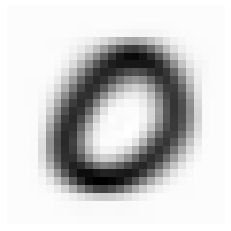

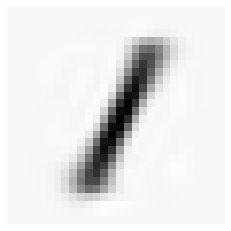

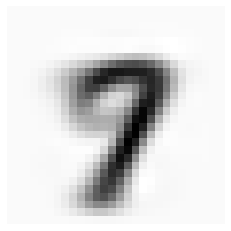

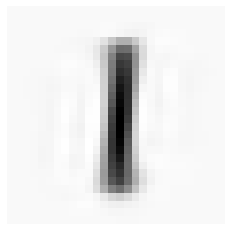

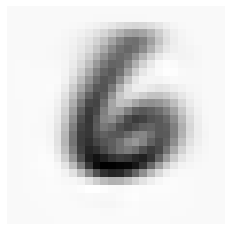

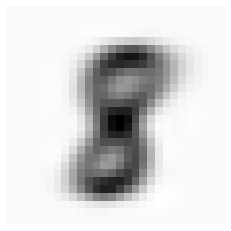

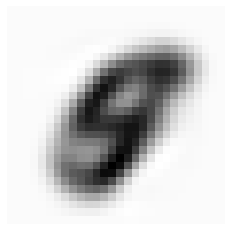

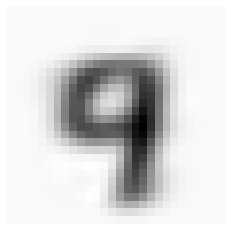

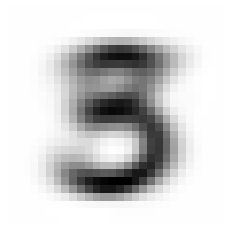

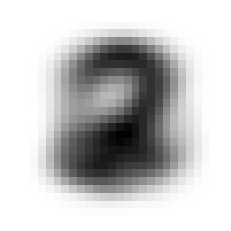

In [180]:
gm_pca_means = gmm_pca.means_
gm_inverse_trans = pca.inverse_transform(gm_pca_means)
i = 0
for digit in gm_inverse_trans:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/pca_gm_means " + str(i) + ".png")
    plt.show()
    i += 1

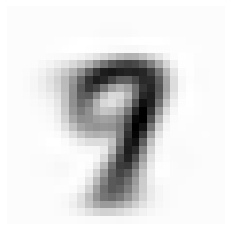

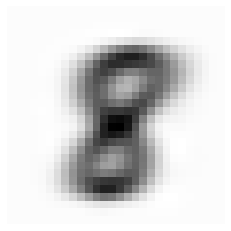

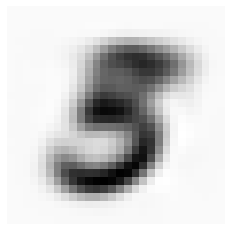

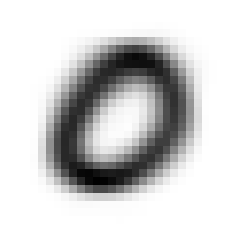

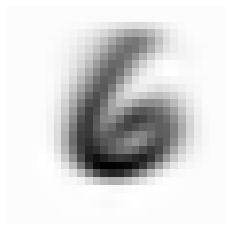

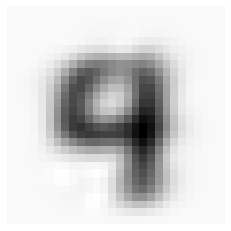

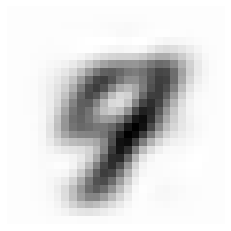

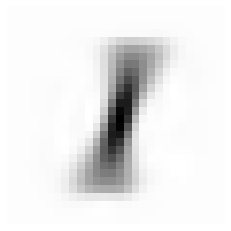

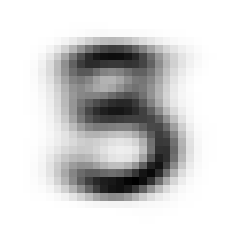

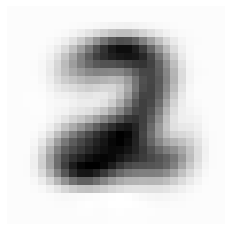

In [182]:
gm_ica_means = gmm_ica.means_
gm_inverse_trans = ica.inverse_transform(gm_ica_means)
gm_inverse_trans = pca.inverse_transform(gm_inverse_trans)
i = 0
for digit in gm_inverse_trans:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/ica_gm_means " + str(i) + ".png")
    plt.show()
    i += 1

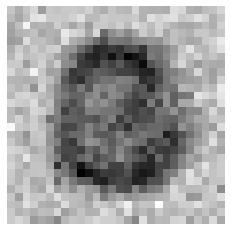

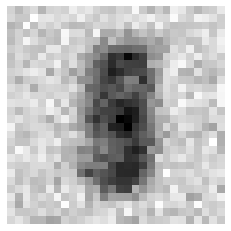

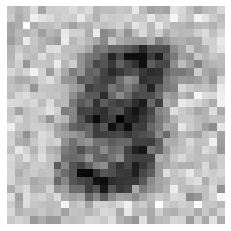

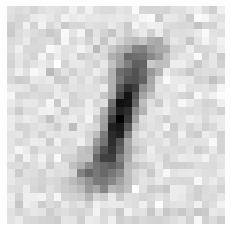

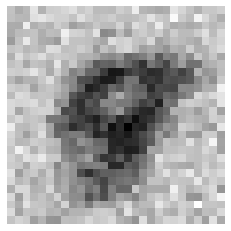

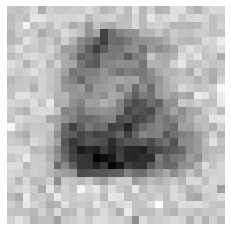

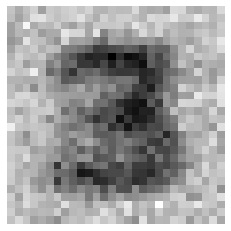

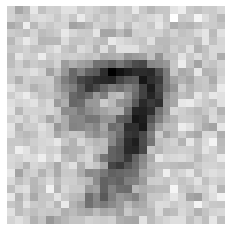

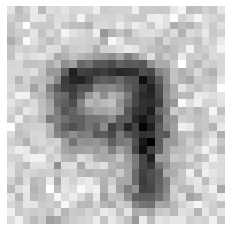

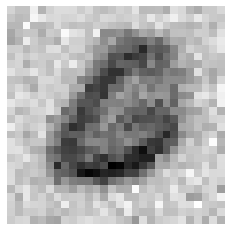

In [183]:
gm_rp_means = gmm_rp.means_
inverse_data = np.linalg.pinv((rp.components_.T))
reconstructed_data = gm_rp_means.dot(inverse_data)
i = 0
for digit in reconstructed_data:
    digit_image = digit.reshape(28,28)
    plt.imshow(digit_image,cmap='binary')
    plt.axis('off')
    plt.savefig("Images/rp_gm_means " + str(i) + ".png")
    plt.show()
    i += 1

In [306]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_pca_scale = scaler.fit_transform(x_pca)
scaler2 = StandardScaler()
x_ica_scale = scaler2.fit_transform(x_ica)
scaler3 = StandardScaler()
x_rp_scale = scaler3.fit_transform(x_rp)

In [307]:
from sklearn.neural_network import MLPClassifier
loss_curve=[]
nn_clf_pca = MLPClassifier(hidden_layer_sizes=(30,20,10), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_pca.set_params(learning_rate_init=rate)
    nn_clf_pca.fit(x_pca_scale,y_train)
    loss_curve.append(nn_clf_pca.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


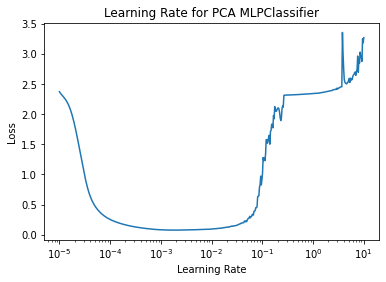

In [308]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for PCA MLPClassifier")
plt.savefig("Images/nn_pca_learning_rate.png")
plt.show()

In [309]:
pca_rate = learning_rates[np.argmin(loss_curve)]
print(pca_rate)

0.0017721357790803584


In [310]:
nn_clf_pca = MLPClassifier(hidden_layer_sizes=(30,20,10),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=pca_rate,random_state=1)
nn_clf_pca.fit(x_pca_scale,y_train)
cv_scores = cross_val_score(nn_clf_pca,x_pca_scale,y_train,cv=5)

In [311]:
scores = []
cv_scores = []
for i in range(1,50):
    nn_clf_pca = MLPClassifier(hidden_layer_sizes=(i,20,10),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=pca_rate*3,random_state=1)
    nn_clf_pca.fit(x_pca_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_pca,x_pca_scale,y_train,cv=5)))
    scores.append(nn_clf_pca.score(x_pca_scale,y_train))

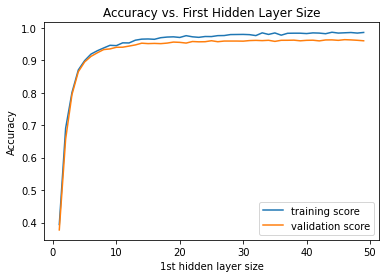

In [313]:
plt.plot(range(1,50),scores,label="training score")
plt.plot(range(1,50),cv_scores,label="validation score")
plt.legend()
plt.xlabel("1st hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. First Hidden Layer Size")
plt.savefig("Images/nn_pca_training_validation_curve.png")
plt.show()

In [317]:
max(scores)

0.9860666666666666

In [318]:
scores = []
cv_scores = []
for i in range(1,50):
    nn_clf_pca = MLPClassifier(hidden_layer_sizes=(i,20,10),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=pca_rate,random_state=1)
    nn_clf_pca.fit(x_pca_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_pca,x_pca_scale,y_train,cv=5)))
    scores.append(nn_clf_pca.score(x_pca_scale,y_train))

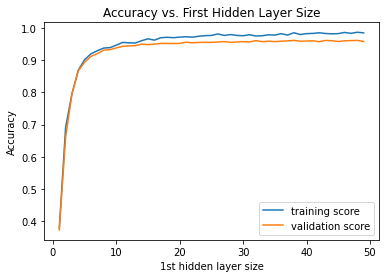

In [319]:
plt.plot(range(1,50),scores,label="training score")
plt.plot(range(1,50),cv_scores,label="validation score")
plt.legend()
plt.xlabel("1st hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. First Hidden Layer Size")
plt.savefig("Images/nn_pca_training_validation_curve2.png")
plt.show()

In [323]:
print(max(cv_scores))
print(max(scores))

0.9619333333333333
0.9872833333333333


In [324]:
loss_curve=[]
nn_clf_ica = MLPClassifier(hidden_layer_sizes=(30,20,10), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_ica.set_params(learning_rate_init=rate)
    nn_clf_ica.fit(x_ica_scale,y_train)
    loss_curve.append(nn_clf_ica.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


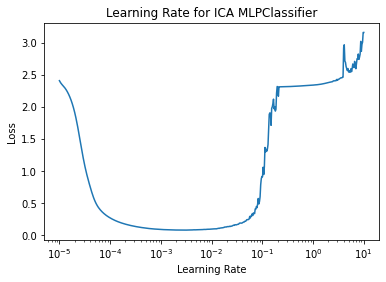

In [325]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for ICA MLPClassifier")
plt.savefig("Images/nn_ica_learning_rate.png")
plt.show()

In [326]:
ica_rate = learning_rates[np.argmin(loss_curve)]
print(ica_rate)

0.002998844231231028


In [327]:
scores = []
cv_scores = []
for i in range(1,50):
    nn_clf_ica = MLPClassifier(hidden_layer_sizes=(i,20,10),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=ica_rate,random_state=1)
    nn_clf_ica.fit(x_ica_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_ica,x_ica_scale,y_train,cv=5)))
    scores.append(nn_clf_ica.score(x_ica_scale,y_train))

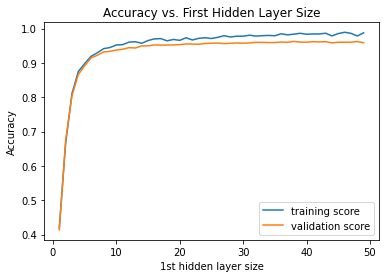

In [328]:
plt.plot(range(1,50),scores,label="training score")
plt.plot(range(1,50),cv_scores,label="validation score")
plt.legend()
plt.xlabel("1st hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. First Hidden Layer Size")
plt.savefig("Images/nn_ica_training_validation_curve.png")
plt.show()

In [329]:
loss_curve=[]
nn_clf_rp = MLPClassifier(hidden_layer_sizes=(300,200,100), solver='adam',warm_start=True,learning_rate_init=0.00001,max_iter=1,random_state=1)
learning_rates = np.logspace(-5,1,num=500)
for rate in learning_rates:
    nn_clf_rp.set_params(learning_rate_init=rate)
    nn_clf_rp.fit(x_rp_scale,y_train)
    loss_curve.append(nn_clf_rp.loss_)

c:\users\steph\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


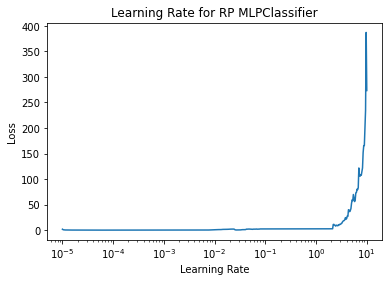

In [330]:
plt.plot(learning_rates,loss_curve)
plt.xscale("log")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate for RP MLPClassifier")
plt.savefig("Images/nn_rp_learning_rate.png")
plt.show()

In [331]:
rp_rate = learning_rates[np.argmin(loss_curve)]
print(rp_rate)

5.8821904016999556e-05


In [332]:
scores = []
cv_scores = []
for i in range(250,500,50):
    nn_clf_rp = MLPClassifier(hidden_layer_sizes=(i,200,100),warm_start=True,early_stopping=True,max_iter=500,learning_rate_init=rp_rate,random_state=1)
    nn_clf_rp.fit(x_rp_scale,y_train)
    cv_scores.append(mean(cross_val_score(nn_clf_rp,x_rp_scale,y_train,cv=5)))
    scores.append(nn_clf_rp.score(x_rp_scale,y_train))

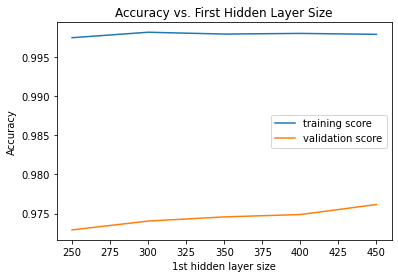

In [333]:
plt.plot(range(250,500,50),scores,label="training score")
plt.plot(range(250,500,50),cv_scores,label="validation score")
plt.legend()
plt.xlabel("1st hidden layer size")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. First Hidden Layer Size")
plt.savefig("Images/nn_rp_training_validation_curve.png")
plt.show()

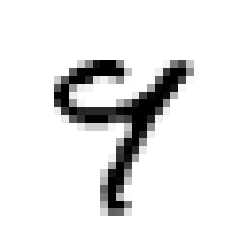

[[0.00000000e+000 0.00000000e+000 2.90040889e-264 0.00000000e+000
  1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 7.40309541e-222 2.35527351e-141
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.48316895e-228 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 5.17881754e-291 1.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 8.31133125e-190 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.44458977e-157 0.00000000e+000

In [303]:
show_digit(54,save=False)
print(gmm.predict_proba(x_train[0:10]))

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes_absarray,train_scoresarray,test_scoresarray,fit_timesarray,score_timesarray = learning_curve(nn_clf_pca,x_pca_scale,y_train,return_times=True,random_state=1)